Dataset: https://www.kaggle.com/datasets/uciml/autompg-dataset/data

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

In [52]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [39]:
df.shape

(398, 9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [41]:
# chnging the 'horsepower' data type to numeric

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [44]:
# 6 values for horsepower column is null
df['horsepower'].isnull().sum()

6

In [45]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21688\2571313987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [ ]:
df_cleaned = pd.get_dummies(df, columns=['origin'], dtype=int)

In [46]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin_1,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_2,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
origin_3,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


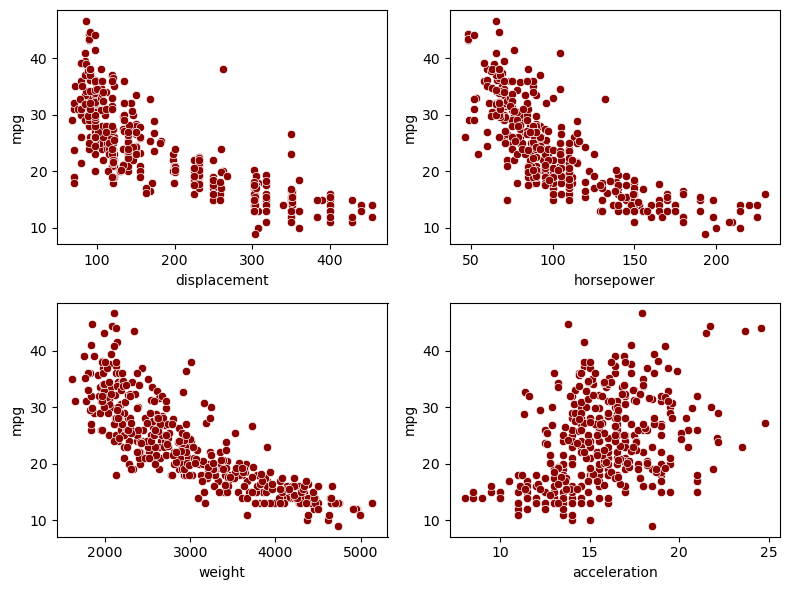

In [47]:
plt.figure(figsize=(8, 6))

for i, col in enumerate(df_cleaned.drop('car name', axis=1).loc[:, ['displacement', 'horsepower', 'weight', 'acceleration']]):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df_cleaned, x=col, y='mpg', color='darkred')

plt.tight_layout()
plt.show()

#### As we can see:
horse power, weight and displacement have negative correlation with mpg, it makes sense. but accelearation has positive correlation with mph.

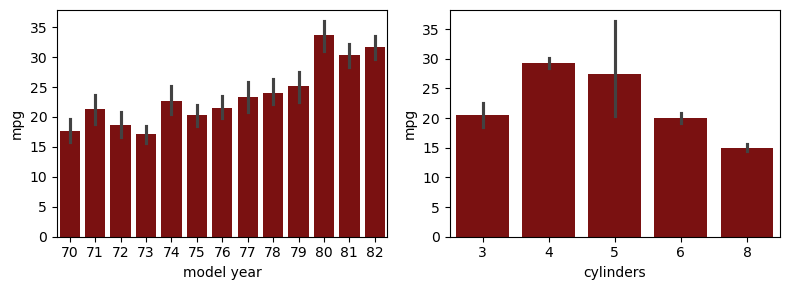

In [48]:
plt.figure(figsize=(8, 3))

for i, col in enumerate(df_cleaned.drop('car name', axis=1).loc[:, ['model year', 'cylinders']]):
    plt.subplot(1, 2, i+1)
    sns.barplot(data=df_cleaned, x=col, y='mpg', color='darkred')

plt.tight_layout()
plt.show()

- it shows, as the time passes and new models of cars came, the mpg has and incremenal trend ---> improving in fuel consumption efficeincy. 

- also the 2nd bar chart shows first, incremental, then decremental trend for # of cylinders vs mpg. it says the higher the # of cylinders, the lower the miles could the car travel. 

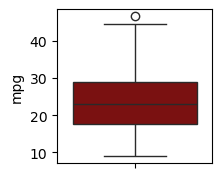

statistical descriptions of the "mpg" box plot:


count    398.00
mean      23.51
std        7.82
min        9.00
25%       17.50
50%       23.00
75%       29.00
max       46.60
Name: mpg, dtype: float64

In [49]:
plt.figure(figsize=(2, 2))
sns.boxplot(data=df_cleaned, y='mpg', color='darkred')
plt.show()

print('statistical descriptions of the "mpg" box plot:')
round(df_cleaned['mpg'].describe(),2)

In [50]:
df_cleaned[df_cleaned['mpg']>40]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3
244,43.1,4,90.0,48.000000,1985,21.5,78,volkswagen rabbit custom diesel,0,1,0
309,41.5,4,98.0,76.000000,2144,14.7,80,vw rabbit,0,1,0
322,46.6,4,86.0,65.000000,2110,17.9,80,mazda glc,0,0,1
324,40.8,4,85.0,65.000000,2110,19.2,80,datsun 210,0,0,1
325,44.3,4,90.0,48.000000,2085,21.7,80,vw rabbit c (diesel),0,1,0
326,43.4,4,90.0,48.000000,2335,23.7,80,vw dasher (diesel),0,1,0
329,44.6,4,91.0,67.000000,1850,13.8,80,honda civic 1500 gl,0,0,1
330,40.9,4,85.0,104.469388,1835,17.3,80,renault lecar deluxe,0,1,0
394,44.0,4,97.0,52.000000,2130,24.6,82,vw pickup,0,1,0


In [67]:
df['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

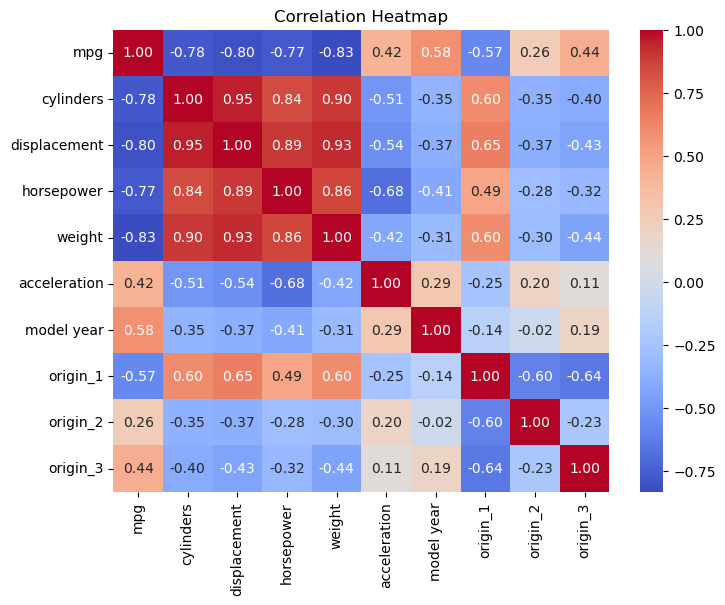

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [69]:
X, y = df_cleaned.drop(['mpg','car name'], axis=1), df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()

X_train_scaled_df = pd.DataFrame(
    scaler.fit_transform(X_train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]),
    columns=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'],
    index=X_train.index  # This is the key for correct alignment!
)

X_test_scaled_df = pd.DataFrame(
    scaler.transform(X_test[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]),
    columns=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'],
    index=X_test.index # Also need to use the test index here
)


# Now, select the one-hot encoded columns from the original train/test sets
X_train_one_hot = X_train[['origin_1', 'origin_2', 'origin_3']]
X_test_one_hot = X_test[['origin_1', 'origin_2', 'origin_3']]


# Concatenation will now work because you are combining two DataFrames with matching indexes
X_train_processed = pd.concat([X_train_scaled_df, X_train_one_hot], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test_one_hot], axis=1)

# Your data is ready! You can now fit the model on X_train_processed
# model.fit(X_train_processed, y_train)

In [71]:
model = LinearRegression()
model.fit(X_train_processed,y_train)

y_predict = model.predict(X_test_processed)

In [72]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print ('MAE:', mae, '\n', 'MSE:', mse, '\n', 'R2:', r2)

MAE: 2.2875867704421027 
 MSE: 8.3391425002559 
 R2: 0.8449006123776617


In [73]:
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])

print("Intercept:", model.intercept_)
print("\n--- Coefficients ---")
print(coeff_df)

Intercept: 24.404019699170476

--- Coefficients ---
              Coefficient
cylinders       -0.275443
displacement     2.013660
horsepower      -0.493846
weight          -5.936123
acceleration     0.202367
model year       2.976569
origin_1        -1.864049
origin_2         1.075196
origin_3         0.788853


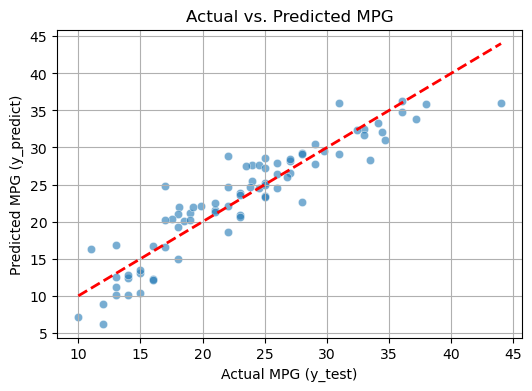

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatterplot of the actual vs. predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.6)

# Add a line for perfect predictions (y=x)
# This line shows where the points would be if y_test == y_predict
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

# Add labels and a title
plt.title('Actual vs. Predicted MPG')
plt.xlabel('Actual MPG (y_test)')
plt.ylabel('Predicted MPG (y_predict)')
plt.grid(True)
plt.show()

In [77]:
# You can experiment with different values like 0.1, 0.5, 5, 10 etc.
ridge_model = Ridge(alpha=1.0)

# 2. Train the model on the same processed training data
ridge_model.fit(X_train_processed, y_train)

# 3. Make predictions on the processed test data
y_predict_ridge = ridge_model.predict(X_test_processed)

# 4. Evaluate the Ridge model
r2_ridge = r2_score(y_test, y_predict_ridge)

print(f"Original Linear Regression R2: {r2:.4f}") # Assuming 'r2' is from your previous model
print(f"Ridge Regression R2: {r2_ridge:.4f}")

# 5. Compare the coefficients to see the shrinking effect
print("\\n--- Linear Regression Coefficients ---")
print(coeff_df) # Assuming 'coeff_df' is from your previous model

ridge_coeff_df = pd.DataFrame(ridge_model.coef_, index=X.columns, columns=['Ridge Coefficient'])
print("\\n--- Ridge Regression Coefficients ---")
print(ridge_coeff_df)

Original Linear Regression R2: 0.8449
Ridge Regression R2: 0.8448
\n--- Linear Regression Coefficients ---
              Coefficient
cylinders       -0.275443
displacement     2.013660
horsepower      -0.493846
weight          -5.936123
acceleration     0.202367
model year       2.976569
origin_1        -1.864049
origin_2         1.075196
origin_3         0.788853
\n--- Ridge Regression Coefficients ---
              Ridge Coefficient
cylinders             -0.226215
displacement           1.725726
horsepower            -0.528488
weight                -5.713978
acceleration           0.158590
model year             2.947359
origin_1              -1.808312
origin_2               1.025772
origin_3               0.782540


In [78]:
from sklearn.model_selection import cross_val_score, KFold

In [83]:
print("\nRunning 10-fold cross-validation...")
scores = cross_val_score(model, X, y, cv=10, scoring='r2')


Running 10-fold cross-validation...


In [87]:
print(f"\nScores for each of the 10 folds:\n {scores}")
print(f"\nAverage R2: {scores.mean()}")
print(f"Standard Deviation of MSE: {scores.std()}")


Scores for each of the 10 folds:
 [0.67371272 0.76701705 0.60447609 0.77298948 0.78382358 0.83287541
 0.54802454 0.76312444 0.02612897 0.58370691]

Average MSE: 0.6355879186682639
Standard Deviation of MSE: 0.2230549658185692


In [88]:
print("\nRunning 10-fold CV with shuffling...")
shuffled_kfold = KFold(n_splits=10, shuffle=True, random_state=42)
shuffled_scores = cross_val_score(model, X, y, cv=shuffled_kfold, scoring='r2')

print(f"\nShuffled Average R2: {shuffled_scores.mean()}")
print(f"Shuffled Std Deviation: {shuffled_scores.std()}")


Running 10-fold CV with shuffling...

Shuffled Average MSE: 0.8155062580721509
Shuffled Std Deviation: 0.030581715052923973


Finding best polynomial degree (using all features)...
  Degree 1: Mean CV MSE = 11.28
  Degree 2: Mean CV MSE = 8.29
  Degree 3: Mean CV MSE = 11.74

--- Best Degree Found: 2 ---


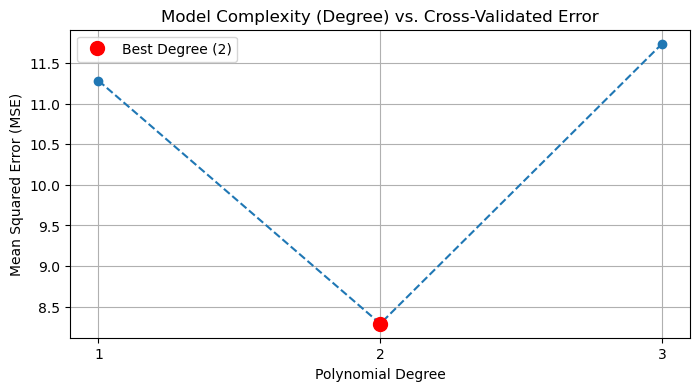


--- KPIs for Best Model (Degree 2) ---
Average 10-fold R-squared (R²): 0.8641
Average 10-fold MAE: 2.0526 (MPG)
Average 10-fold RMSE: 2.8466 (MPG)


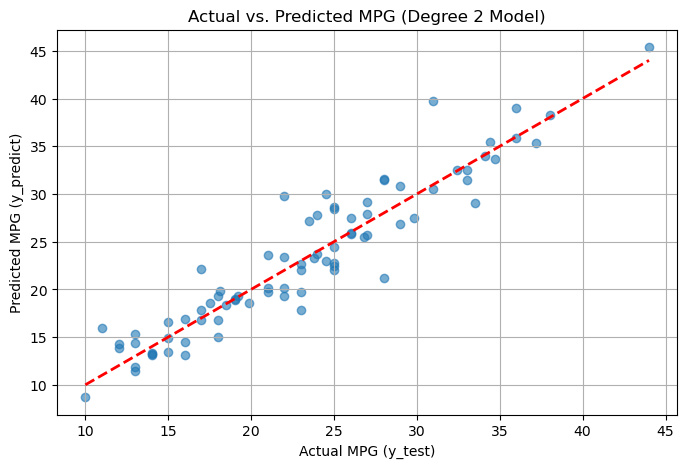


--- KPIs for the Single Test Split (for visualization) ---
Test R²: 0.8729
Test MAE: 1.9384
Test RMSE: 2.6139


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# --- 0. Define Data and Feature Names ---
# Use the full X and y you defined before splitting
X = df_cleaned.drop(['mpg','car name'], axis=1)
y = df_cleaned['mpg']

# List of columns to be scaled and have poly features applied
continuous_features = [
    'cylinders', 'displacement', 'horsepower', 
    'weight', 'acceleration', 'model year'
]
# List of one-hot encoded columns to be passed through
one_hot_features = ['origin_1', 'origin_2', 'origin_3']

# Use a 10-fold split for all cross-validation
shuffled_kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# --- 1. Find the Best Polynomial Degree ---
print("Finding best polynomial degree (using all features)...")

degrees_to_check = range(1, 4) # Check degrees 1, 2, and 3
# Note: Degree 4+ creates thousands of features and will likely fail
cv_mean_errors = []

for degree in degrees_to_check:
    
    # Create a pipeline JUST for the continuous features
    continuous_pipeline = Pipeline([
        ('scale', StandardScaler()),
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False))
    ])
    
    # Create the main ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('continuous_poly', continuous_pipeline, continuous_features),
            ('onehot', 'passthrough', one_hot_features)
        ],
        remainder='drop' 
    )
    
    # Create the final, full pipeline
    final_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    
    # Run 10-fold cross-validation for MSE
    # (We use 'try' in case a high degree causes a numerical error)
    try:
        scores = cross_val_score(
            final_pipeline, X, y, 
            cv=shuffled_kfold, 
            scoring='neg_mean_squared_error'
        )
        mean_mse = -scores.mean()
        cv_mean_errors.append(mean_mse)
        print(f"  Degree {degree}: Mean CV MSE = {mean_mse:.2f}")

    except Exception as e:
        print(f"  Degree {degree}: Failed. {e}")
        cv_mean_errors.append(np.inf) # Add infinity to show it failed

# Find the best degree
best_degree_index = np.argmin(cv_mean_errors)
best_degree = degrees_to_check[best_degree_index]
lowest_error = cv_mean_errors[best_degree_index]

print(f"\n--- Best Degree Found: {best_degree} ---")

# --- Visualization 1: Plot Degree vs. Error ---
plt.figure(figsize=(8, 4))
plt.plot(degrees_to_check, cv_mean_errors, marker='o', linestyle='--')
plt.plot(best_degree, lowest_error, 'ro', markersize=10, label=f'Best Degree ({best_degree})')
plt.title('Model Complexity (Degree) vs. Cross-Validated Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.xticks(degrees_to_check)
plt.show()


# --- 2. Get KPIs (Model Evaluations) for the Best Model ---

print(f"\n--- KPIs for Best Model (Degree {best_degree}) ---")

# Re-create the best pipeline using the best degree
continuous_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=best_degree, include_bias=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('continuous_poly', continuous_pipeline, continuous_features),
        ('onehot', 'passthrough', one_hot_features)
    ]
)
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Get R-squared (R²)
r2_scores = cross_val_score(best_pipeline, X, y, cv=shuffled_kfold, scoring='r2')
print(f"Average 10-fold R-squared (R²): {r2_scores.mean():.4f}")

# Get Mean Absolute Error (MAE)
mae_scores = cross_val_score(best_pipeline, X, y, cv=shuffled_kfold, scoring='neg_mean_absolute_error')
print(f"Average 10-fold MAE: {-mae_scores.mean():.4f} (MPG)")

# Get Root Mean Squared Error (RMSE)
rmse_scores = np.sqrt(-cross_val_score(best_pipeline, X, y, cv=shuffled_kfold, scoring='neg_mean_squared_error'))
print(f"Average 10-fold RMSE: {rmse_scores.mean():.4f} (MPG)")


# --- 3. Visualize the Fitted Model ---
# For a multi-feature model, we plot Actual vs. Predicted

# We need to split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best pipeline on the TRAINING data
best_pipeline.fit(X_train, y_train)

# Make predictions on the TEST data
y_predict = best_pipeline.predict(X_test)

# --- Visualization 2: Plot Actual vs. Predicted ---
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, alpha=0.6)
# Add the 'perfect prediction' line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title(f'Actual vs. Predicted MPG (Degree {best_degree} Model)')
plt.xlabel('Actual MPG (y_test)')
plt.ylabel('Predicted MPG (y_predict)')
plt.grid(True)
plt.show()

# You can also get the KPIs for this *single test split*
print(f"\n--- KPIs for the Single Test Split (for visualization) ---")
print(f"Test R²: {r2_score(y_test, y_predict):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_predict):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_predict)):.4f}")

----
##### we applied polynomial regression and tuned the evaluation metrics (R2: ~0.85 --> 0.87)

#### Now:
##### feature engineering for optimization:
- creating new features which they have strong corr.
- model_year: we can do both OHE (one-hot encding) or convert it to binned categorical classes and the OHE ([70-73],[74,77],...)

let's see what will happen:


In [102]:
# task1: defining the new features by combining the related features

df_cleaned['power_to_weight'] = df_cleaned['horsepower'] / df_cleaned['weight']
df_cleaned['weight_x_accel'] = df_cleaned['weight'] * df_cleaned['acceleration']
df_cleaned['disp_per_cyl'] = df_cleaned['displacement'] / df_cleaned['cylinders']

In [103]:
df_cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3,power_to_weight,weight_x_accel,disp_per_cyl
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0,0.037100,42048.0,38.375
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0,0.044679,42469.5,43.750
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0,0.043655,37796.0,39.750
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0,0.043694,41196.0,38.000
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0,0.040591,36214.5,37.750


In [107]:
# task 2: binning the model year:

print(df_cleaned['model year'].unique())

bins = [70, 73, 76, 79, 82]
labels = ['70-73', '74-76', '77-79', '80-82']
df_cleaned['year_era'] = pd.cut(df_cleaned['model year'], bins=bins, labels=labels, right=True, include_lowest=True)
df_cleaned.sample(10)

[70 71 72 73 74 75 76 77 78 79 80 81 82]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3,power_to_weight,weight_x_accel,disp_per_cyl,year_era
352,29.9,4,98.0,65.0,2380,20.7,81,ford escort 2h,1,0,0,0.027311,49266.0,24.500000,80-82
76,18.0,4,121.0,112.0,2933,14.5,72,volvo 145e (sw),0,1,0,0.038186,42528.5,30.250000,70-73
146,28.0,4,90.0,75.0,2125,14.5,74,dodge colt,1,0,0,0.035294,30812.5,22.500000,74-76
323,27.9,4,156.0,105.0,2800,14.4,80,dodge colt,1,0,0,0.037500,40320.0,39.000000,80-82
376,37.0,4,91.0,68.0,2025,18.2,82,mazda glc custom l,0,0,1,0.033580,36855.0,22.750000,80-82
124,11.0,8,350.0,180.0,3664,11.0,73,oldsmobile omega,1,0,0,0.049127,40304.0,43.750000,70-73
16,18.0,6,199.0,97.0,2774,15.5,70,amc hornet,1,0,0,0.034968,42997.0,33.166667,70-73
18,27.0,4,97.0,88.0,2130,14.5,70,datsun pl510,0,0,1,0.041315,30885.0,24.250000,70-73
392,27.0,4,151.0,90.0,2950,17.3,82,chevrolet camaro,1,0,0,0.030508,51035.0,37.750000,80-82
13,14.0,8,455.0,225.0,3086,10.0,70,buick estate wagon (sw),1,0,0,0.072910,30860.0,56.875000,70-73


In [108]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['year_era'], dtype=int)

In [110]:
df_cleaned.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3,power_to_weight,weight_x_accel,disp_per_cyl,year_era_70-73,year_era_74-76,year_era_77-79,year_era_80-82
43,13.0,8,400.0,170.0,4746,12.0,71,ford country squire (sw),1,0,0,0.035820,56952.0,50.00,1,0,0,0
191,22.0,6,225.0,100.0,3233,15.4,76,plymouth valiant,1,0,0,0.030931,49788.2,37.50,0,1,0,0
359,28.1,4,141.0,80.0,3230,20.4,81,peugeot 505s turbo diesel,0,1,0,0.024768,65892.0,35.25,0,0,0,1
231,15.5,8,400.0,190.0,4325,12.2,77,chrysler cordoba,1,0,0,0.043931,52765.0,50.00,0,0,1,0
78,21.0,4,120.0,87.0,2979,19.5,72,peugeot 504 (sw),0,1,0,0.029204,58090.5,30.00,1,0,0,0


In [111]:
df_cleaned.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'origin_1', 'origin_2',
       'origin_3', 'power_to_weight', 'weight_x_accel', 'disp_per_cyl',
       'year_era_70-73', 'year_era_74-76', 'year_era_77-79', 'year_era_80-82'],
      dtype='object')

In [114]:
columns_to_drop = ['mpg', 'car name', 'model year']
X = df_cleaned.drop(columns_to_drop, axis=1)
y = df_cleaned['mpg']

In [115]:
# All columns that need to be scaled
continuous_features = [
    'cylinders', 'displacement', 'horsepower', 
    'weight', 'acceleration',
    'power_to_weight', 'weight_x_accel', 'disp_per_cyl'
]

# All columns that are already one-hot encoded (binary)
categorical_features = [
    'origin_1', 'origin_2', 'origin_3',
    'year_era_70-73', 'year_era_74-76', 
    'year_era_77-79', 'year_era_80-82'
]

print("Feature engineering complete. X and y are ready.")
print(f"Total features in X: {len(X.columns)}")


Feature engineering complete. X and y are ready.
Total features in X: 15



--- Evaluating with single Train/Test split ---
Test R²: 0.8878
Test MAE: 1.9111

--- Evaluating with 10-Fold Cross-Validation ---
Average 10-Fold CV R²: 0.8635
Standard Deviation of R²: 0.0211


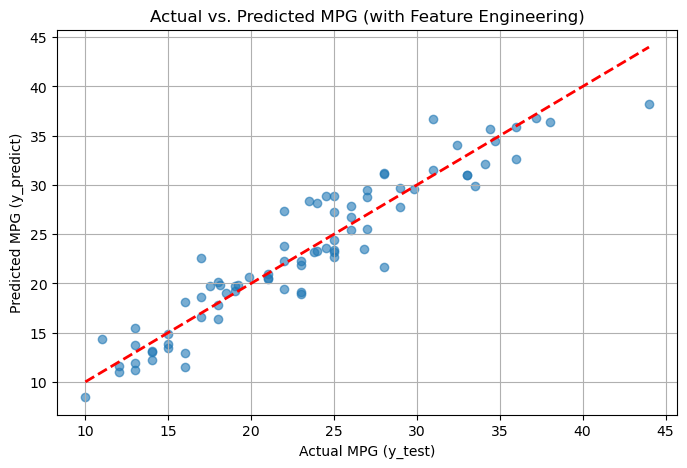

In [116]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), continuous_features),
        ('pass', 'passthrough', categorical_features)],
        remainder='drop'
)

model = LinearRegression()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

print("\n--- Evaluating with single Train/Test split ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

# Report KPIs for this single split
print(f"Test R²: {r2_score(y_test, y_predict):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_predict):.4f}")


# --- 4. Get the *Reliable* Score using 10-Fold Cross-Validation ---
print("\n--- Evaluating with 10-Fold Cross-Validation ---")

# Use the same KFold settings for a reliable comparison
shuffled_kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Run cross-validation on the *entire pipeline* and the *full X and y* data
r2_scores = cross_val_score(pipeline, X, y, cv=shuffled_kfold, scoring='r2')

print(f"Average 10-Fold CV R²: {r2_scores.mean():.4f}")
print(f"Standard Deviation of R²: {r2_scores.std():.4f}")


# --- 5. Visualization (Actual vs. Predicted) ---
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted MPG (with Feature Engineering)')
plt.xlabel('Actual MPG (y_test)')
plt.ylabel('Predicted MPG (y_predict)')
plt.grid(True)
plt.show()
